In [75]:
import numpy as np
import pandas as pd
from sodapy import Socrata

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt

## Project Ideas

* Given the Geodata, date, time, -- How likely the complaint to be of a certain category?
Purpose: Help government to allocate resources efficiently 

* Which depertments are most efficient with responding to service requests
* Where the complaints are coming from, when and from whom?

## Data

In [57]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
# link https://dev.socrata.com/foundry/data.cityofnewyork.us/fhrw-4uyv
# tatal record = 9362925
results = client.get("fhrw-4uyv", limit=93629)

# Convert to pandas DataFrame
data = pd.DataFrame.from_records(results)

In [79]:
total_record = 9362925
selected_record = 93629
selected_record/total_record*100

0.9999973298942372

### Datatypes

In [61]:
date_cols = ['closed_date', 'created_date', 'due_date']
for col in date_cols:
    data[col] = pd.to_datetime(data[col])

In [85]:
data[['unique_key', 'agency', 'complaint_type', 'status',
      'closed_date', 'created_date', 'due_date']].to_pickle('Data/timedelta_study.pkl')

#### Parse data and time

In [ ]:
data['closed_date_year'] = data['closed_date'].dt.year
data['closed_date_month'] = data['closed_date'].dt.month
data['closed_date_dayofmonth'] = data['closed_date'].dt.day
data['closed_date_dayofweek'] = data['closed_date'].dt.dayofweek
data['closed_date_hour'] = data['closed_date'].dt.hour

data['created_date_year'] = data['created_date'].dt.year
data['created_date_month'] = data['created_date'].dt.month
data['created_date_dayofmonth'] = data['created_date'].dt.day
data['created_date_dayofweek'] = data['created_date'].dt.dayofweek
data['created_date_hour'] = data['created_date'].dt.hour

data['due_date_year'] = data['due_date'].dt.year
data['due_date_month'] = data['due_date'].dt.month
data['due_date_dayofmonth'] = data['due_date'].dt.day
data['due_date_dayofweek'] = data['due_date'].dt.dayofweek
data['due_date_hour'] = data['due_date'].dt.hour

In [81]:
data['response_time'] = (data['closed_date'] - data['created_date']) / dt.timedelta(minutes=1)
data['remaining_time'] = (data['due_date'] - data['closed_date']) / dt.timedelta(minutes=1)


In [80]:
data.status.value_counts()

Closed      89470
Pending      2181
Assigned     1065
Open          876
Started        36
Name: status, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler


### Missing Values

In [19]:
data.isnull().sum()/len(data)*100

address_type                       0.260603
agency                             0.000000
agency_name                        0.000000
bbl                               16.309050
borough                            0.000000
bridge_highway_direction          99.831249
bridge_highway_name               99.831249
bridge_highway_segment            99.831249
city                               0.007476
closed_date                        2.195901
community_board                    0.000000
complaint_type                     0.000000
created_date                       0.000000
cross_street_1                    52.867167
cross_street_2                    52.968632
descriptor                         0.000000
due_date                          61.070822
facility_type                      0.001068
incident_address                  12.158626
incident_zip                       0.017089
intersection_street_1             87.596792
intersection_street_2             87.596792
landmark                        

Text(0.5,1,'% of NaN values by agency')

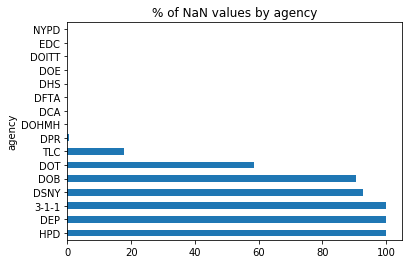

In [115]:
# Null due date by agency
d = (data[data.due_date.isnull()].groupby(['agency']).unique_key.count()/data.groupby(['agency']).unique_key.count()*100)
# d = d.unstack
d.sort_values(ascending=False).plot(kind='barh')
plt.title("% of NaN values by agency")

## Evaluating Features

#### Address Type

In [91]:
data.address_type.unique()

array(['ADDRESS', 'BLOCKFACE', 'INTERSECTION', 'LATLONG', nan, 'PLACENAME'], dtype=object)

Text(0.5,1,'Complaint Counts by Address Types')

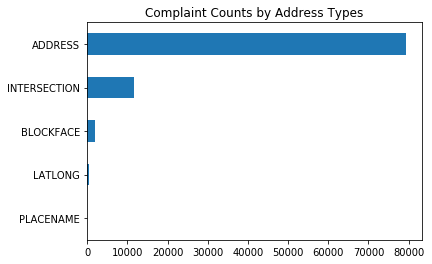

In [116]:
data.address_type.value_counts(ascending=True).plot(kind='barh')
plt.title("Complaint Counts by Address Types")

#### Agency

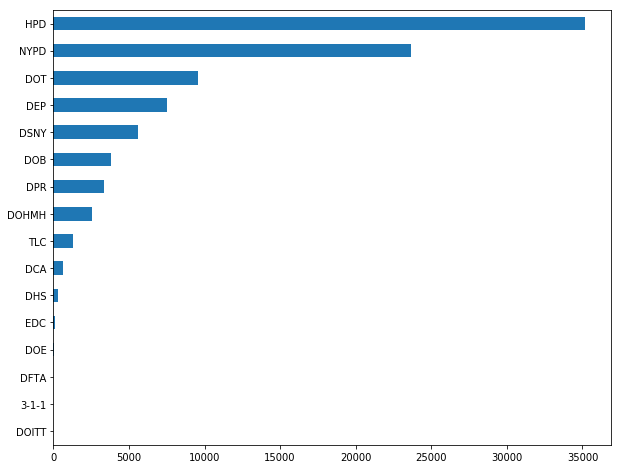

In [110]:
data.agency.value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(10,8))

In [86]:
data.columns

Index(['address_type', 'agency', 'agency_name', 'bbl', 'borough',
       'bridge_highway_direction', 'bridge_highway_name',
       'bridge_highway_segment', 'city', 'closed_date', 'community_board',
       'complaint_type', 'created_date', 'cross_street_1', 'cross_street_2',
       'descriptor', 'due_date', 'facility_type', 'incident_address',
       'incident_zip', 'intersection_street_1', 'intersection_street_2',
       'landmark', 'latitude', 'location', 'location_type', 'longitude',
       'open_data_channel_type', 'park_borough', 'park_facility_name',
       'resolution_action_updated_date', 'resolution_description', 'road_ramp',
       'status', 'street_name', 'taxi_company_borough',
       'taxi_pick_up_location', 'unique_key', 'vehicle_type',
       'x_coordinate_state_plane', 'y_coordinate_state_plane', 'response_time',
       'remaining_time'],
      dtype='object')

In [ ]:
keep = ['address_type', 'agency']

discard = ['agency_name', 'bbl']

maybe = ['borough']

#### Complaint Types

In [5]:
top_complaints = data.complaint_type.value_counts()[
    data.complaint_type.value_counts()>data.complaint_type.value_counts().mean()]

Text(0.5,1,'Top Complaints')

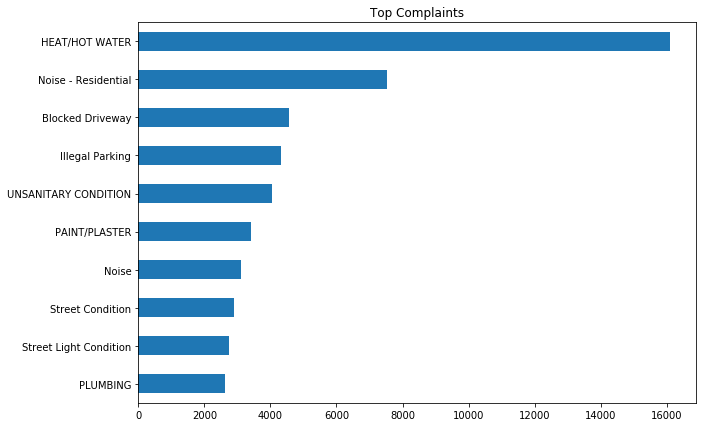

In [117]:
top_complaints.head(10).sort_values(ascending=True).plot(kind='barh', figsize=(10,7))
plt.title("Top Complaints")

In [120]:
data[['agency_name', 'agency']]

KeyError: ('agency_name', 'agency')

for i, col in enumerate(data.columns):
    print(i, col)